In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
Ra = 5
Ca = 50
Ro = 0
Rc = 0
Cc = 0


def Z_RC_par(w,R,C):
    if R!=0 and C!=0:
        Z = 1/(1/R + w*C*1j)
    elif C==0 and R!=0:
        Z = R
    elif R==0 and C!=0:
        Z = 1/(w*C*1j)
    elif R==0 and C==0:
        Z=0
    return Z

def Z_cpe(w,Q,n):
    Z = (1/(Q*w**n))*np.exp(-np.pi*n*1j/2)
    #equiv to: Z = (1/(Q*w**n))*1j**(-n)
    return Z

def Z_par(Z1,Z2):
    return 1/(1/Z1 + 1/Z2)


def Z_tot(w,Ra,Ca,Ro,Rc,Cc):
    Za = Z_RC_par(w,Ra,Ca)
    Zc = Z_RC_par(w,Rc,Cc)
    return Ro + Za + Zc


def Z_plot(Ra,Ca,Ro,Rc,Cc):
    freq = np.arange(1e-5,1e1,1e-5)

    Z_comp = Z_tot(freq,Ra,Ca,Ro,Rc,Cc)
    Z_real = Z_comp.real
    Z_imag = Z_comp.imag

    fig = plt.figure(figsize=(5,5))
    plt.plot(Z_real,-Z_imag)
    plt.xlim([0,100])
    plt.ylim([0,100])
    plt.xticks(np.arange(0,110,10))
    plt.yticks(np.arange(0,110,10))
    
def nyquist(Z_comp,ax=None,Zmax=None,ymin=None,**kwargs):
    Z_real = Z_comp.real
    Z_imag = Z_comp.imag
    if Zmax==None:
        Zmax = 1.1*np.max(np.hstack((-Z_imag,Z_real)))
    if ymin==None:
        ymin = np.min(np.append(-Z_imag,0))
        if ymin < 0:
            ymin = ymin - Zmax*0.1
    if ax==None:
        fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(Z_real,-Z_imag, **kwargs)
    ax.set_xlim([0,Zmax*1.1])
    ax.set_ylim([ymin,Zmax*1.1])
#     plt.xticks(np.arange(0,110,10))
#     plt.yticks(np.arange(0,110,10))


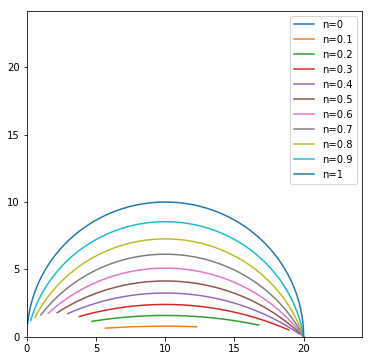

In [71]:
freq = np.arange(1e-5,1e1,1e-5)
Q = 0.1
R = 20
# n=0.1
# Z_comp = Z_par(Z1=Z_cpe(freq,Q,n), Z2=R)
# nyquist(Z_comp, label='n={}'.format(n))
fig, ax = plt.subplots(figsize=(6,6))
for n in np.arange(0,1.1,0.1):
    Z_comp = Z_par(Z1=Z_cpe(freq,Q,n), Z2=R)
    nyquist(Z_comp, ax=ax, label='n={:.2g}'.format(n))
ax.legend()

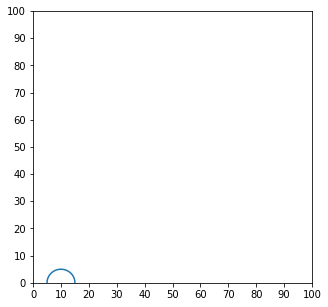

In [107]:
Z_plot(Ra=10,Ca=10,Ro=5,Rc=0,Cc=0)

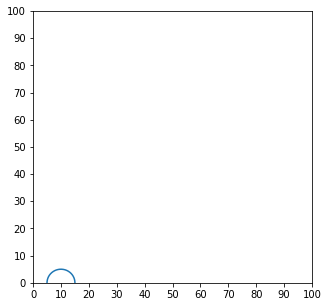

In [108]:
Z_plot(Ra=10,Ca=1,Ro=5,Rc=0,Cc=0)

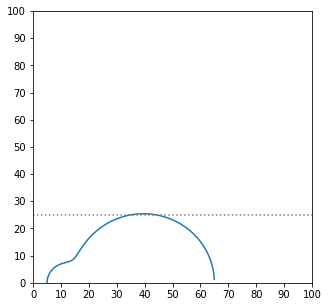

In [109]:
Z_plot(Ra=10,Ca=10,Ro=5,Rc=50,Cc=50)
plt.axhline(y=25,ls=':',c='gray')

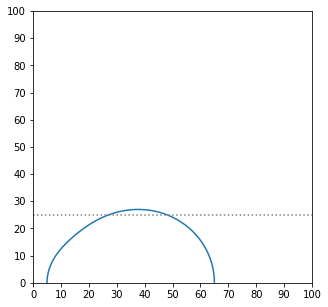

In [110]:
Z_plot(Ra=10,Ca=10,Ro=5,Rc=50,Cc=10)
plt.axhline(y=25,ls=':',c='gray')

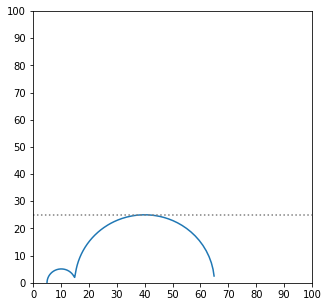

In [111]:
Z_plot(Ra=10,Ca=1,Ro=5,Rc=50,Cc=100)
plt.axhline(y=25,ls=':',c='gray')

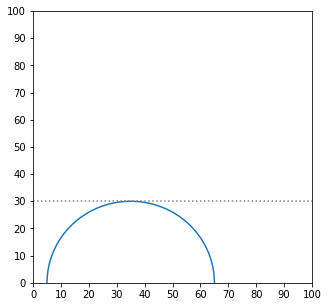

In [112]:
#same RC product
Z_plot(Ra=10,Ca=10,Ro=5,Rc=50,Cc=2)
plt.axhline(y=30,ls=':',c='gray')

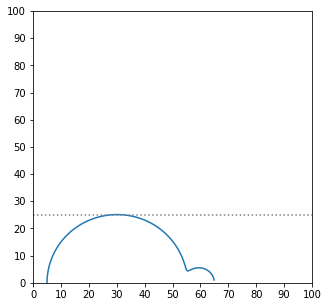

In [115]:
#smaller R but larger RC product for anode
Z_plot(Ra=10,Ca=1000,Ro=5,Rc=50,Cc=2)
plt.axhline(y=25,ls=':',c='gray')